# 1.11 Stepik ML contest - data preprocessing

In [2]:
import pandas as pd
import numpy as np

# чтение данных из файла
event_data = pd.read_csv('data/event_data_train.csv')
submissions_data = pd.read_csv('data/submissions_data_train.csv')

# добавим колонки datetime и date для удобства
# datetime - тип данных datetiem64
# date - тип данных object
event_data['datetime'] = pd.to_datetime(event_data['timestamp'], unit ='s')
event_data['date'] = event_data.datetime.dt.date

submissions_data['datetime'] = pd.to_datetime(submissions_data['timestamp'], unit = 's')
submissions_data['date'] = submissions_data.datetime.dt.date

event_data.head()

,step_id,timestamp,action,user_id,datetime,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


59.777989583333316

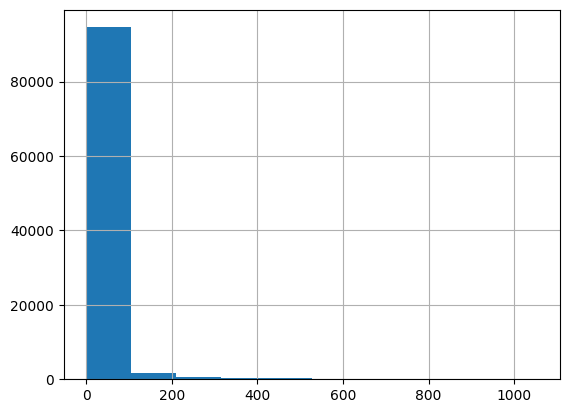

In [14]:
# Найдем для каждого пользователя промежутки между активностями

# выбираем три колонки и удаляем дубликаты, оставляя только одну запись, timestamp берем или первое или последнее значение
unique_event_data_for_user = event_data[['user_id', 'date', 'timestamp']].drop_duplicates(subset=['user_id', 'date'], keep='last')

# для каждого пользователя найдем разницу между двумя ближайшими заходами на курс
# получим разницу между датами с помощью np.diff
# получим массив из массивов
diff_users_date_action = unique_event_data_for_user.groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

#diff_users_date_action

# переводим в один массив и оборачиваем в серию
diff_users_date_action =  pd.Series(np.concatenate(diff_users_date_action, axis=0))

# переводим разницу в дни
diff_users_day = diff_users_date_action / (24 * 60 * 60)
#diff_users_day
#diff_users_day[diff_users_day < 200].hist()
diff_users_day.hist()

# квантиль из 95% - говорит нам о том, что у 95% пользователей перерыв между входами составляет до 59 дней
diff_users_day.quantile(0.95)